# Summarizing failure reasons
This notebook demonstrates how one can dive into summarizing error messages and failure reasones. The `_result.jsonl` files contain a column `result`, which contains a string, that in case of test failure is "failed: " and in other cases contains additionally the error message that was observed. These failures and errors can be summarized for each model as shown here.

In [1]:
import pandas as pd
import os

In [2]:
directory = "../data/"
# if you want to investigate a single model only, add its name here:
search_term = ""

# Enter the terms to search for here
common_errors = ['has no attribute', 'invalid syntax', 'is not defined', "Can't convert object", 'cannot import', 'out of range', 'unexpected keyword argument']

First we collect all results and the corresponding models from the jsonl files.

In [3]:
collection = []
for filename in os.listdir(directory):
    if search_term in filename and filename.endswith("_results.jsonl"):
        df = pd.read_json(directory + filename, lines=True)
        df['model'] = filename.replace("samples_","").replace("_results","").replace(".jsonl","")
        collection.append(df)

if len(collection) == 1:
    df = collection[0]
else:
    df = pd.concat(collection)

We then focus on the tests which failed.

In [4]:
df = df[df['passed'] == False]
df

,task_id,completion,full_response,result,passed,model
0,../test_cases/apply_otsu_threshold_and_count_p...,\nimport numpy as np\nfrom skimage import filt...,"Sure, here is the complete code with the funct...",failed:,False,deepseek-coder-v2
5,../test_cases/convex_hull_measure_area.ipynb,\nimport numpy as np\nfrom scipy.spatial impor...,Here is the Python code that completes the fun...,failed:,False,deepseek-coder-v2
7,../test_cases/count_number_of_touching_neighbo...,\nimport numpy as np\nfrom scipy import ndimag...,```python\nimport numpy as np\nfrom scipy impo...,failed:,False,deepseek-coder-v2
9,../test_cases/count_overlapping_regions.ipynb,\nimport numpy as np\nfrom scipy import ndimag...,Here's the complete code for the function `cou...,failed:,False,deepseek-coder-v2
11,../test_cases/crop_quarter_image.ipynb,\nimport numpy as np\n\ndef crop_quarter_image...,"Sure, here's the complete code with a plan for...",failed:,False,deepseek-coder-v2
...,...,...,...,...,...,...
560,../test_cases/sum_intensity_projection.ipynb,"\ndef sum_intensity_projection(image):\n """"...",```python\ndef sum_intensity_projection(image)...,failed:,False,gpt-4o-2024-05-13_old_prompt
561,../test_cases/tiled_image_processing.ipynb,"\ndef tiled_image_processing(image, radius, ti...","```python\ndef tiled_image_processing(image, r...",failed:,False,gpt-4o-2024-05-13_old_prompt
562,../test_cases/transpose_image_axes.ipynb,"\ndef transpose_image_axes(image):\n """"""\n ...",```python\ndef transpose_image_axes(image):\n ...,failed: axes don't match array,False,gpt-4o-2024-05-13_old_prompt
564,../test_cases/workflow_batch_process_folder_co...,\ndef workflow_batch_process_folder_count_labe...,```python\ndef workflow_batch_process_folder_c...,failed:,False,gpt-4o-2024-05-13_old_prompt


In [5]:
# Just some examples to get an idea
df.head(10)['result'].tolist()

['failed: ',
 'failed: ',
 'failed: ',
 'failed: ',
 'failed: ',
 'failed: signal must be 1-D.',
 "failed: OpenCV(4.9.0) d:\\a\\opencv-python\\opencv-python\\opencv\\modules\\imgproc\\src\\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'\n> Invalid number of channels in input image:\n>     'VScn::contains(scn)'\n> where\n>     'scn' is 1\n",
 'failed: ',
 'failed: ',
 'failed: ']

## Searching for common terms
First, we search the error messages for common errors as specified above.

In [6]:
# Define the function to count errors
def count_errors(group, error_list):
    counts = {error: group['result'].str.contains(error, regex=False).sum() for error in error_list}
    return pd.Series(counts)

# Apply the function to each model group
error_counts = df.groupby('model').apply(count_errors, error_list=common_errors)

# Transpose the result for the desired format: models as columns, errors as rows
error_counts = error_counts.T
error_counts

C:\Users\rober\AppData\Local\Temp\ipykernel_38332\3576577103.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  error_counts = df.groupby('model').apply(count_errors, error_list=common_errors)


model,deepseek-coder-v2,deepseek-coder-v2_old_prompt,gpt-4o-2024-05-13,gpt-4o-2024-05-13_old_prompt
has no attribute,30,31,24,33
invalid syntax,3,4,0,0
is not defined,4,2,0,0
Can't convert object,0,0,0,0
cannot import,13,7,6,2
out of range,3,0,0,1
unexpected keyword argument,9,11,8,5


In [7]:
# reorder columns to be similar to evaluation result plots
with open("model_order.txt", 'r') as f:
    columns_in_order = f.readlines()
    columns_in_order = [c.strip() for c in columns_in_order if "reference" not in c]
columns_in_order

['gpt-4o-2024-05-13',
 'gpt-4o-2024-05-13_old_prompt',
 'deepseek-coder-v2',
 'deepseek-coder-v2_old_prompt']

In [8]:
error_counts = error_counts[columns_in_order]
error_counts

model,gpt-4o-2024-05-13,gpt-4o-2024-05-13_old_prompt,deepseek-coder-v2,deepseek-coder-v2_old_prompt
has no attribute,24,33,30,31
invalid syntax,0,0,3,4
is not defined,0,0,4,2
Can't convert object,0,0,0,0
cannot import,6,2,13,7
out of range,0,1,3,0
unexpected keyword argument,8,5,9,11


0.13.2


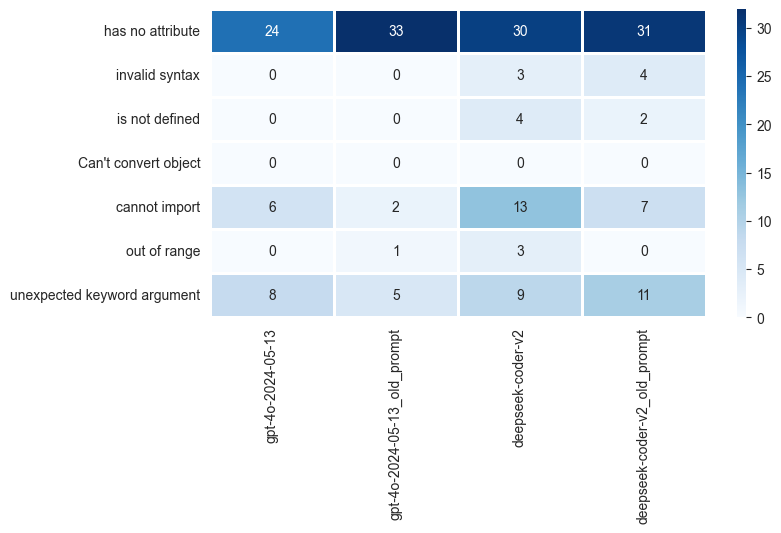

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print(sns.__version__)
sns.set_style("white")


# Separate the numerical data for plotting and the string column for y-axis labels
numerical_data = error_counts.select_dtypes(include=[np.number])

# Plotting
fig = plt.figure(figsize=(8,4))
#plot square heatmap entries
sns.heatmap(numerical_data, annot=True, linewidths=1, fmt=".0f", cbar_kws={'shrink': 1, 'aspect': 2*16}, cmap="Blues", robust=True)
plt.gca().set_xlabel('')
plt.gca().set_ylabel('')

plt.savefig("../docs/paper/error_counts_heatmap.png", dpi=300, bbox_inches="tight")
plt.show()

In [10]:
error_counts.columns = [f"\\rot{{{col}}}" for col in error_counts.columns]
error_counts

,\rot{gpt-4o-2024-05-13},\rot{gpt-4o-2024-05-13_old_prompt},\rot{deepseek-coder-v2},\rot{deepseek-coder-v2_old_prompt}
has no attribute,24,33,30,31
invalid syntax,0,0,3,4
is not defined,0,0,4,2
Can't convert object,0,0,0,0
cannot import,6,2,13,7
out of range,0,1,3,0
unexpected keyword argument,8,5,9,11


Next we save the dataframe as tex to disk, so that we can include it in the manuscript.

In [11]:
# Convert DataFrame to TeX format string
tex_str = error_counts.to_latex()

# Define filename for the TeX file
tex_filename = '../docs/paper/error_counts_table.tex'

# Write the TeX format string to a file
with open(tex_filename, 'w') as tex_file:
    tex_file.write(tex_str)

## Most popular failure reasons
Furthermore, we search for the three most observed reasons for failure. These might be either error messages, or in case the result is only `failed: ` this indicated that the tests were not passed, presumably because the tested function did not return the right result.

In [12]:
# Step 1: Group the DataFrame by 'model' and get the value counts of 'result'
model_result_count = df.groupby('model')['result'].value_counts()

# Step 2: Create an empty DataFrame to store the results
model_top_results = []

# Step 3: Loop through each group to get the three most common results per model
for model, counts in model_result_count.groupby(level=0):
    # Get the top three results (note: nlargest returns the results)
    top_three = counts.nlargest(3)
    # Prepare data to append to the DataFrame
    data = {
        'Model': model,
        'Top1 Result': top_three.index.get_level_values(1)[0],
        'Top1 Count': top_three.iloc[0],
        'Top2 Result': top_three.index.get_level_values(1)[1] if len(top_three) > 1 else None,
        'Top2 Count': top_three.iloc[1] if len(top_three) > 1 else None,
        'Top3 Result': top_three.index.get_level_values(1)[2] if len(top_three) > 2 else None,
        'Top3 Count': top_three.iloc[2] if len(top_three) > 2 else None
    }
    # Append data
    model_top_results.append(data)

# Display the resulting DataFrame
most_common_errors = pd.DataFrame(model_top_results)
most_common_errors

,Model,Top1 Result,Top1 Count,Top2 Result,Top2 Count,Top3 Result,Top3 Count
0,deepseek-coder-v2,failed:,156,failed: 'list' object has no attribute 'shape',15,failed: OpenCV(4.9.0) D:\a\opencv-python\openc...,10
1,deepseek-coder-v2_old_prompt,failed:,166,failed: OpenCV(4.10.0) d:\a\opencv-python\open...,16,failed: OpenCV(4.10.0) D:/a/opencv-python/open...,11
2,gpt-4o-2024-05-13,failed:,140,failed: 'list' object has no attribute 'shape',22,failed: OpenCV(4.9.0) D:/a/opencv-python/openc...,10
3,gpt-4o-2024-05-13_old_prompt,failed:,146,failed: 'list' object has no attribute 'shape',21,failed: OpenCV(4.9.0) d:\a\opencv-python\openc...,12
